## Building Agentic Workflows with Model Context Protocol on Azure

✍️ AI Applications are evolving rapidly. With every new AI application built, orgnaziations are facing the the complexity of managing AI Assistants, Tools and Data sources increase. As the AI applications evolve, organizations want to add more tools and embed the new knowledge or intelligence into existing applictions. However, the challenge always is that there is no standard protocol to connect LLMs to AI Assistants, tools and datasources. 


Every new 

In [1]:
## Install dependencies
# %pip install -q mcp[cli] azure-identity python-dotenv azure-ai-projects aiohttp

Download the dataset from the [link]("https://arxiv.org/pdf/2503.05142") and save it to ./data folder.

### Deploy Agents to Azure AI Agentic Service

Before you begin, follow the below steps

1. Create an Azure Open AI service. [Link](https://learn.microsoft.com/en-us/azure/ai-services/openai/how-to/create-resource?pivots=web-portal)
2. Create a Azure AI Foundry Project [Link](https://learn.microsoft.com/en-us/azure/ai-foundry/how-to/create-projects?tabs=ai-studio)
3. Create a .env file at the root with following arguments

```
PROJECT_CONNECTION_STRING="<<PROJECT-CONNECTION-STRING-FROM-PORTAL>>"
```

In [ ]:
from azure.ai.projects import AIProjectClient
from azure.identity import DefaultAzureCredential
from azure.ai.projects.models import FileSearchTool, MessageAttachment, FilePurpose
import os
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

project_client = AIProjectClient.from_connection_string(credential=DefaultAzureCredential(), conn_str=os.environ["PROJECT_CONNECTION_STRING"])
    
# We will upload the local file and will use it for vector store creation.
#upload a file
file = project_client.agents.upload_file_and_poll(file_path='../data/mobile_phones_2000.txt', purpose=FilePurpose.AGENTS)
print(f"Uploaded file, file ID: {file.id}")

# create a vector store with the file you uploaded
vector_store = project_client.agents.create_vector_store_and_poll(file_ids=[file.id], name="my_vectorstore")
print(f"Created vector store, vector store ID: {vector_store.id}")

# create a file search tool
file_search_tool = FileSearchTool(vector_store_ids=[vector_store.id])

# notices that FileSearchTool as tool and tool_resources must be added or the agent will be unable to search the file
agent = project_client.agents.create_agent(
    model="phi4-reasoning",
    name="mobiles-recommender-agent",
    instructions="You are an expert at identify best mobile phones given query from customer. \
        You will search the file for relevant information and provide the best answer in the form of JSON.",
    tools=file_search_tool.definitions,
    tool_resources=file_search_tool.resources,
)   

print(f"Created agent, agent ID: {agent.id}")  

Uploaded file, file ID: assistant-5XdTgwav69hHtW3L7EMixo
Created vector store, vector store ID: vs_JnMPe5D6Fqd3okJMtaltT026
Created agent, agent ID: asst_23dlCRuxI2tkX4WTNOQYoVrT


In [ ]:
# create a writer agent
writer_agent = project_client.agents.create_agent(
    model="gpt-4o-mini",
    name="mobiles-agent",
    instructions="",
)





AttributeError: 'AgentsOperations' object has no attribute 'threads'

### Run the server

Run the below command to start the MCP Server.
```
python -m azure_agent_mcp_server.py
```

**Note**: Optional
If you have many agents, you can declare a default agent. Copy the Agent name from above and add a new Key/Value pair in .env file  as shown below. 
```
DEFAULT_AGENT_ID='<<AGENT-ID-FROM-ABOVE>>'
```


### Connect to Agents using Claude Desktop Client

Claude desktop is tool that understands the MCP server protol. Hence it can be used quickly connect to MCP servers and 

```
{
  "mcpServers": {
    "azure-agent": {
      "command": "uv",
      "args": [
        "--directory",
        "C:/azureml/azure-ai-mcp/", # Absolute path to server.py file
        "run",
        "-m",
        "azure_agent_mcp_server"
      ],
      "env": {
        "PROJECT_CONNECTION_STRING": "", # Project connection string
        "DEFAULT_AGENT_ID": "" # default agent id.
      }
    }
  }
}
```


Reopen Claude desktop, notice that the chat interface shows 3 tools available for chat. 

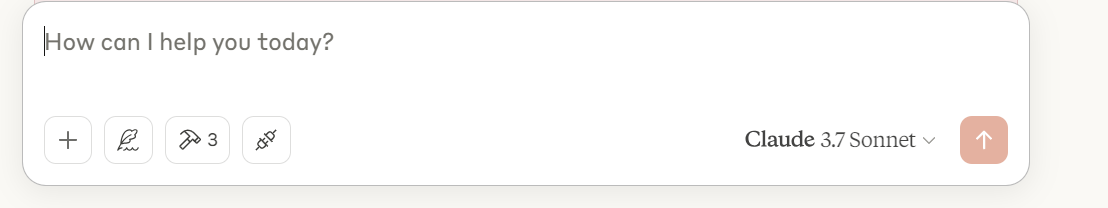



### Connect to Agents using our own console client

### Cleanup

In [ ]:
print(f"Created writer agent, agent ID: {writer_agent.id}")

Deleted vector store
Deleted agent
